In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
omegas = np.linspace(0.4,-0.2,20)-1j*np.linspace(0.2,5,20)

def design_matrix(t,modes):
    M = np.zeros((t.shape[0],len(modes)),dtype='complex128')
    for m in modes:
        M[:,m] = np.exp(-1j*omegas[m]*t)
    return M
def reconstruct_sig(t,x,modes):
    sig = np.zeros(t.shape[0],dtype='complex128')
    for m in modes:
        sig+=x[m]*np.exp(-1j*omegas[m]*t)
    return(sig)

In [8]:
t = np.linspace(0,100,500)
transient = 0.5*np.exp(-t**2/20)
signal = 5*np.exp(-1j*omegas[0]*t)+transient
modes = np.arange(10)
M = design_matrix(t,modes)

In [9]:
x,res,rank,s = np.linalg.lstsq(M,signal,rcond=None)

In [10]:
x

array([   4.98626636-2.53844171e-02j,    1.27537395+1.76238353e+00j,
        -24.94171263-3.98934737e+01j,  115.06585202+3.98258187e+02j,
       -171.91608395-1.73168143e+03j,  -44.70160705+4.13063949e+03j,
        444.87697131-5.87774040e+03j, -565.05035895+4.99375913e+03j,
        312.74147958-2.34197535e+03j,  -66.83615482+4.66897029e+02j])

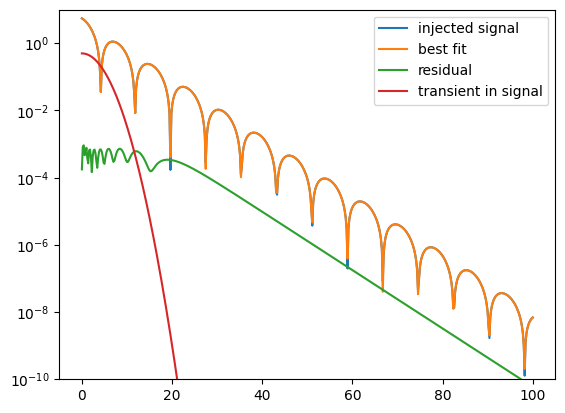

In [11]:
plt.plot(t,np.abs(signal.real),label='injected signal')
plt.plot(t,np.abs(reconstruct_sig(t,x,modes).real),label='best fit')
plt.plot(t,np.abs(signal-reconstruct_sig(t,x,modes)),label='residual')

plt.plot(t,transient,label='transient in signal')
plt.yscale('log')
plt.ylim(1e-10,10)
plt.legend()

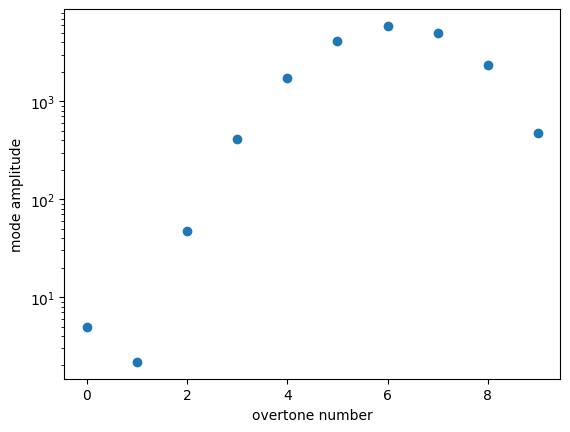

In [12]:
plt.scatter(modes,np.abs(x))
plt.xlabel('overtone number')
plt.ylabel('mode amplitude')

plt.yscale('log')